Data is loaded in the list..
('The length of entire data is:', 768)
('Entire data is divided in Training and Testing dataset in ratio of ', 50, 50)
('Entire data is divided in Training and Testing dataset in ratio of ', 60, 40)
('Entire data is divided in Training and Testing dataset in ratio of ', 70, 30)
('Entire data is divided in Training and Testing dataset in ratio of ', 80, 20)
('Entire data is divided in Training and Testing dataset in ratio of ', 90, 10)
('Data Count', {80: [614, 154], 50: [384, 384], 60: [460, 308], 90: [691, 77], 70: [537, 231]})
('Accuracy', {80: [72.72727272727273, 77.92207792207793, 74.67532467532467, 70.77922077922078, 75.32467532467533], 50: [76.04166666666666, 72.91666666666666, 75.0, 75.0, 73.4375], 60: [72.40259740259741, 69.15584415584416, 68.5064935064935, 72.72727272727273, 71.1038961038961], 90: [71.42857142857143, 68.83116883116884, 81.81818181818183, 72.72727272727273, 71.42857142857143], 70: [74.45887445887446, 74.45887445887446, 71.8614718614

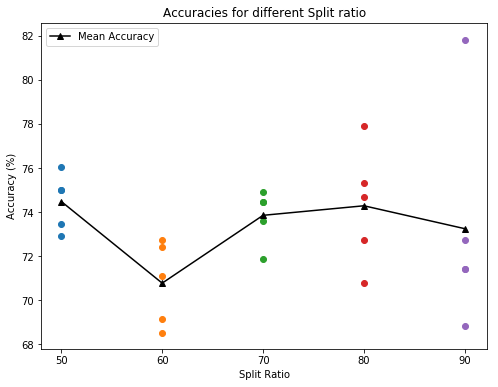

The best accuracy 74.479167 is achieved at split ratio 50-50
Precision is 62.581843
Recall is 67.174315
False Positive Rate is 21.671999


In [1]:
# Naive Bayseian Algorithm
# Part2 Diabetis Dataset
# Binary Classification

import csv
import random as rd
import math
import numpy as np
import matplotlib.pyplot as plt

# to plot graph in same block
get_ipython().magic(u'matplotlib inline')
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load python module
get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

#Load the data in list
def loadFile(filename):
    lines = csv.reader(open(filename, "rb"))
    data_set = list(lines)
    #converting the datavalues in float value
    for i in range(len(data_set)):
        data_row = []
        for j in data_set[i]:
            data_row.append(float(j))
        data_set[i] = data_row
    print("Data is loaded in the list..")
    return data_set

#Divide the data in training and test data
def splitData(dataset, splitRatio):
    
    train_Size = int(len(dataset) * splitRatio / 100)
    train_data = []
    i = 0
    temp = dataset[:]
    while i < train_Size:
        k = rd.randrange(len(temp))
        train_data.append(temp.pop(k))
        i += 1
    test_data = temp
    return train_data, test_data

#Train the model using the training data
    
def clusterData(dataset):
    cluster = {}
    for i in range(len(dataset)):
        temp = dataset[i]
        if (temp[-1] not in cluster):
            cluster[temp[-1]] = []
        cluster[temp[-1]].append(temp)
    return cluster

def summarize(dataset):
    stat_field = []
    for attribute in zip(*dataset):
            stat_field.append((np.mean(attribute), np.std(attribute)))
    del stat_field[-1]
    return stat_field

def clusterStat(dataset):
    cluster = clusterData(dataset)
    analyse = {}
    for key, value in cluster.items():
        analyse[key] = summarize(value)
    #print(analyse)
    return analyse

#Test the model created earlier
def calProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    prob = (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
    return prob

def calculateClusterProbabilities(cluster_stat, test_row):
    probability = {}
    for key, value in cluster_stat.items():
        probability[key] = 1
        for i in range(len(value)):
            mean, stdev = value[i]
            x = test_row[i]
            
            probability[key] *= calProbability(x, mean, stdev)
    return probability

def predictRow(cluster_stat, test_row):
    row_probability = calculateClusterProbabilities(cluster_stat, test_row)
    Label = None
    Prob = -1
    for key, value in row_probability.iteritems():
        if Label is None or value > Prob:
            Prob = value
            Label = key
    return Label

def getPredictions(cluster_stat, test_data):
    predictions = []
    for i in range(len(test_data)):
        result = predictRow(cluster_stat, test_data[i])
        predictions.append(result)
    return predictions

# Find the accuracy of the algorithm
def checkAccuracy(test_data, predictions):
    cnt = 0
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(test_data)):
        if test_data[i][-1] == predictions[i]:
            cnt += 1
            if predictions[i] == 1:
                TP += 1
            if predictions[i] == 0:
                TN += 1
        else:
            if predictions[i] == 1:
                FP += 1
            if predictions[i] == 0:
                FN += 1
    accuracy = (cnt / float(len(test_data))) * 100
    
    precision = TP / float(TP +FP) * 100
    recall = TP / float(TP + FN) * 100
    FPR = FP / float(FP + TN) * 100
    return accuracy,precision,recall,FPR

def main():
    filename = 'diabetes.csv'
    data_set = loadFile(filename)
    
    print("The length of entire data is:", len(data_set))
    split_accuracy = {}
    split_val = {}
    split_precision = {}
    split_recall = {}
    split_FPR = {}
    
    for i in range(50,100,10):
        split_accuracy[i] = []
        split_precision[i] = []
        split_recall[i] = []
        split_FPR[i] = []
        print("Entire data is divided in Training and Testing dataset in ratio of ",i, 100 - i)
        
        for j in range(5):
            split_per = i
            train_data, test_data = splitData(data_set, split_per)
            
            split_val[i] = [len(train_data),len(test_data)]

            # Create a model based on the training data
            cluster_stat = clusterStat(train_data)

            # Test the model created based on the test data
            predictions = getPredictions(cluster_stat, test_data)

            # find the accuracy of the model
            accuracy,precision,recall,FPR = checkAccuracy(test_data, predictions)
            split_accuracy[i].append(accuracy)
            split_precision[i].append(precision)
            split_recall[i].append(recall)
            split_FPR[i].append(FPR)
            
    print("Data Count", split_val)
    
    print("Accuracy", split_accuracy)
    
    # plot the observations
    for k in sorted(split_accuracy.keys()):
        accuracies = split_accuracy[k]
        plt.scatter([k] * len(accuracies), accuracies)

    # plot the mean line of it
    mean_split_acc = []
    for k,v in sorted(split_accuracy.items()):
        mean_split_acc.append(np.mean(v))
    plt.plot(sorted(split_accuracy.keys()), mean_split_acc, marker='^',color='black',label='Mean Accuracy')
    
    plt.title('Accuracies for different Split ratio')
    plt.xlabel('Split Ratio')
    plt.xticks(sorted(split_accuracy.keys()))
    plt.ylabel('Accuracy (%)')
    plt.legend(loc='best')
    plt.show()

    best_acc = max(mean_split_acc)
    best_index = mean_split_acc.index(max(mean_split_acc))
    split = sorted(split_accuracy.keys())
        
    print('================================================================')
    print("The best accuracy %f is achieved at split ratio %d-%d" % (best_acc,split[best_index],100 -split[best_index]))
    print('================================================================')

    mean_precision = np.mean(split_precision.get(split[best_index]))
    mean_recall = np.mean(split_recall.get(split[best_index]))
    mean_FPR = np.mean(split_FPR.get(split[best_index]))
    
    print("Precision is %f" % (mean_precision))
    print("Recall is %f" % (mean_recall))
    print("False Positive Rate is %f" % (mean_FPR))
    
    print('================================================================')
    
main()